In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
print(f"X shape: {x_train.shape}, x type: {type(x_train)}")
print(x_train)
print(f"y shape: {y_train.shape}, y type: {type(y_train)}")
print(y_train)

X shape: (3, 4), x type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y shape: (3,), y type: <class 'numpy.ndarray'>
[460 232 178]


In [4]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [5]:
def predict_single_loop(x,w,b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i]* w[i]
        p = p + p_i
    p = p + b 
    return p

In [6]:
x_vec = x_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (4,), x_vec value: [2104    5    1   45]
f_wb shape: (), prediction: 459.9999976194083


In [7]:
def predict(x,w,b):
    p = np.dot(x,w) + b
    return p

In [8]:
x_vec = x_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (4,), x_vec value: [2104    5    1   45]
f_wb shape: (), prediction: 459.9999976194083


In [9]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x,w[i]) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2*m)
    return cost

In [10]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"cost at optimal w: {cost}")

cost at optimal w: [[2.35e+09 1.07e+05 1.23e+05 8.81e+05]
 [1.06e+09 1.13e+05 1.18e+05 6.91e+05]
 [3.81e+08 1.18e+05 1.23e+05 5.28e+05]]


In [16]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(x[i],w)+b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw,dj_db

In [17]:
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
dj_dw at initial w,b: -1.6739251501955248e-06


In [18]:
def gradient_descent(x,y,w_in,b_in,cost_function, gradient_function, alpha, num_iters):
    j_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 1000000:
            j_history.append(cost_function(x,y,w,b))
        
        if i% math.ceil(num_iters/10) == 0:
            print(f'Iteration {i:4d}: cost {j_history[-1]:8.2f}')
    return w,b,j_history
    

In [19]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 10000
alpha = 5.0e-7
w_final, b_final , j_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f'prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]} ')

TypeError: unsupported format string passed to numpy.ndarray.__format__

NameError: name 'j_hist' is not defined

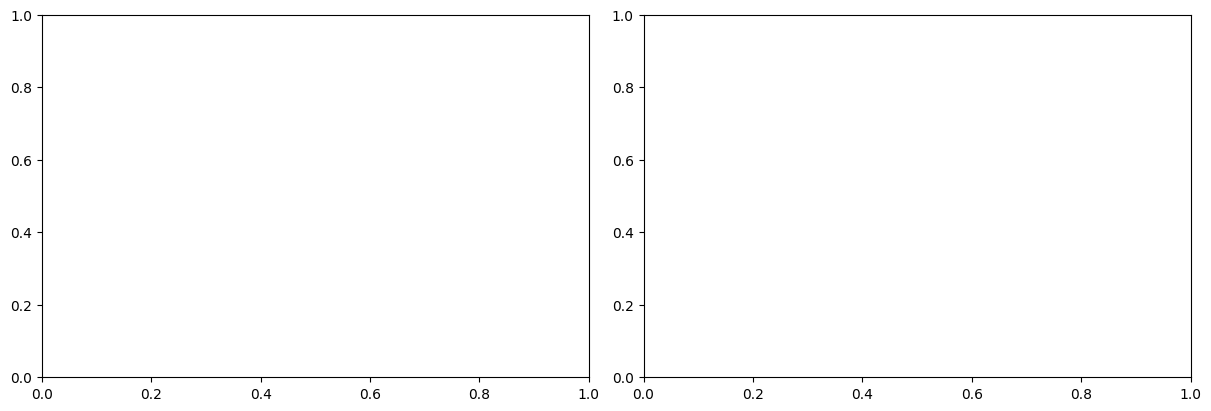

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_hist)
ax2.plot(100 + np.arange(len(j_hist[100:])), j_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()